<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа» - Множественное тестирование</b></h3>


## Импорт библиотек

In [38]:
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Импорт данных

In [39]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, опираясь уже **НЕ** только на визуализацию. Само задание выполнить на языке **Python**.


# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить (drop_duplicates). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (dropna())
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Сколько их?

In [40]:
data.drop_duplicates(inplace=True)

data.dropna(axis=1, inplace=True)

Q1 = data['home_cost'].quantile(0.25)
Q3 = data['home_cost'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['home_cost'] < lower_bound) | (data['home_cost'] > upper_bound)]
num_outliers = len(outliers)

data = data[(data['home_cost'] >= lower_bound) & (data['home_cost'] <= upper_bound)]

# Проверка гипотез

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">

<b>Задание:</b>    
    
Перед вами уже знакомый датасет, который был дан в прошлых домашних заданиях. Вы уже научились применить подходящий статистический критерий для двух групп, теперь вам предстоит научиться верно применять критерии для нескольких групп одновременно. 
    

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

Результаты однофакторного дисперсионного анализа (ANOVA):
F-статистика: 12628.746929047362
p-значение: 0.0


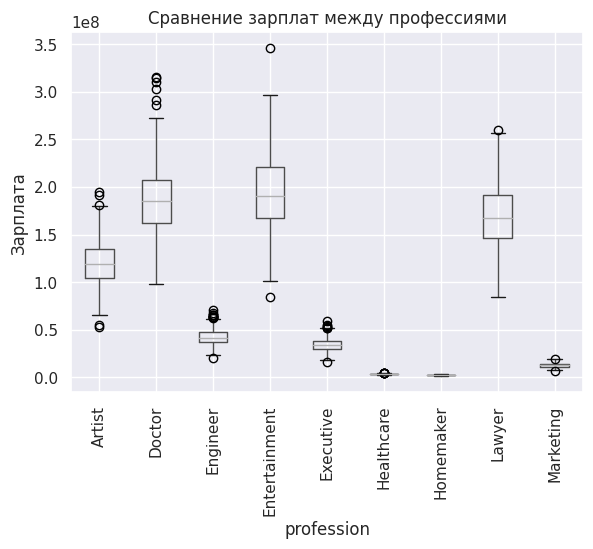

In [41]:
# Создаем подвыборки для каждой профессии
homemaker_salaries = data[data['profession'] == 'Homemaker']['salary']
marketing_salaries = data[data['profession'] == 'Marketing']['salary']
healthcare_salaries = data[data['profession'] == 'Healthcare']['salary']
executive_salaries = data[data['profession'] == 'Executive']['salary']

# Выполняем однофакторный дисперсионный анализ (ANOVA)
f_statistic, p_value = stats.f_oneway(homemaker_salaries, marketing_salaries, healthcare_salaries, executive_salaries)

# Выводим результаты
print("Результаты однофакторного дисперсионного анализа (ANOVA):")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

data.boxplot(column='salary', by='profession')
plt.xticks(rotation='vertical')
plt.ylabel('Зарплата')
plt.title('Сравнение зарплат между профессиями')
plt.suptitle('')  # Удаляем заголовок верхнего уровня
plt.show()

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

Результаты однофакторного дисперсионного анализа (ANOVA):
F-статистика: 88.92649642294668
p-значение: 1.023070527084598e-37


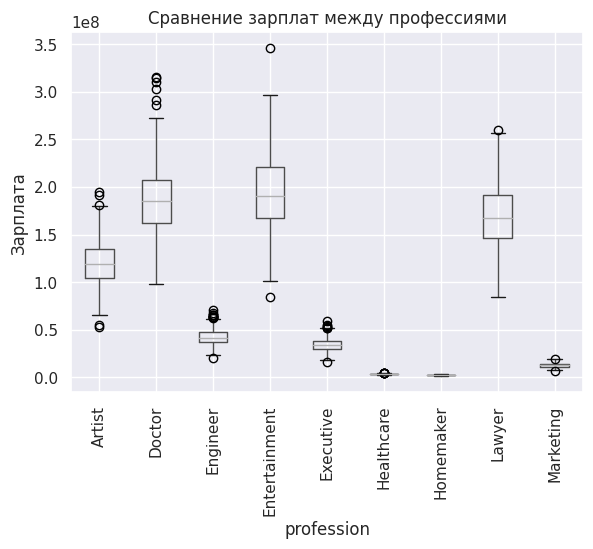

In [42]:
# Создаем подвыборки для каждой профессии
doctor_salaries = data[data['profession'] == 'Doctor']['salary']
entertainment_salaries = data[data['profession'] == 'Entertainment']['salary']
lawyer_salaries = data[data['profession'] == 'Lawyer']['salary']

# Выполняем однофакторный дисперсионный анализ (ANOVA)
f_statistic, p_value = stats.f_oneway(doctor_salaries, entertainment_salaries, lawyer_salaries)

# Выводим результаты
print("Результаты однофакторного дисперсионного анализа (ANOVA):")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

data.boxplot(column='salary', by='profession')
plt.xticks(rotation='vertical')
plt.ylabel('Зарплата')
plt.title('Сравнение зарплат между профессиями')
plt.suptitle('')  # Удаляем заголовок верхнего уровня
plt.show()

<div class="alert alert-warning">
    
Допустим вы рассматриваете 4 группы населения, отличающихся количеством  детей. Группы следующие.
* **A** - нет детей
* **B** - 1 ребенок
* **C** - от 2 до 4 детей
* **D** - от 5 детей    
    
    
* Правда ли, что эти группы отличаются статистически значимо по уровню дохода и уровню счастья? Ответ поддержите статистическими критериями и визуализацией

In [43]:
# Создаем подвыборки для каждой группы
group_A_salary = data[data['children'] == 0]['salary']
group_B_salary = data[data['children'] == 1]['salary']
group_C_salary = data[(data['children'] >= 2) & (data['children'] <= 4)]['salary']
group_D_salary = data[data['children'] == 5]['salary']

# Выполняем однофакторный дисперсионный анализ (ANOVA)
f_statistic_salary, p_value_salary = stats.f_oneway(group_A_salary, group_B_salary, group_C_salary, group_D_salary)

# Выводим результаты
print("Результаты однофакторного дисперсионного анализа (ANOVA) для уровня дохода:")
print("F-статистика:", f_statistic_salary)
print("p-значение:", p_value_salary)

Результаты однофакторного дисперсионного анализа (ANOVA) для уровня дохода:
F-статистика: nan
p-значение: nan


/home/andrey/___project/python/Introduction_to_the_specialty_and_tools_for_working_with_data/venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [44]:
# Создаем подвыборки для каждой группы
group_A_happiness = data[data['children'] == 0]['happyness']
group_B_happiness = data[data['children'] == 1]['happyness']
group_C_happiness = data[(data['children'] >= 2) & (data['children'] <= 4)]['happyness']
group_D_happiness = data[data['children'] == 5]['happyness']

# Выполняем однофакторный дисперсионный анализ (ANOVA)
f_statistic_happiness, p_value_happiness = stats.f_oneway(group_A_happiness, group_B_happiness, group_C_happiness,
                                                          group_D_happiness)

# Выводим результаты
print("Результаты однофакторного дисперсионного анализа (ANOVA) для уровня счастья:")
print("F-статистика:", f_statistic_happiness)
print("p-значение:", p_value_happiness)

Результаты однофакторного дисперсионного анализа (ANOVA) для уровня счастья:
F-статистика: nan
p-значение: nan


<module 'matplotlib.pyplot' from '/home/andrey/___project/python/Introduction_to_the_specialty_and_tools_for_working_with_data/venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

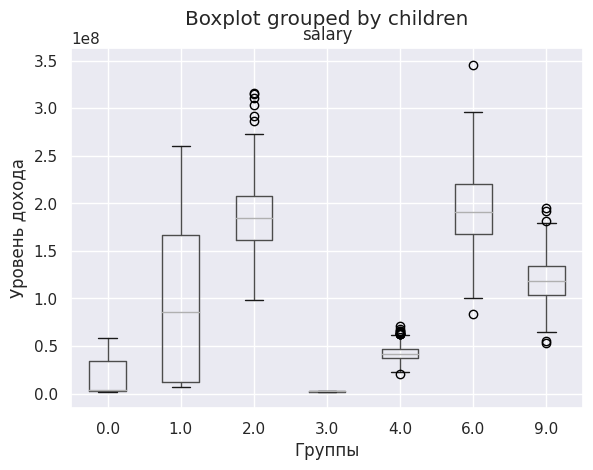

In [45]:
data.boxplot(column='salary', by='children')
plt.xlabel('Группы')
plt.ylabel('Уровень дохода')
plt
